# Lab 4

## import libs and connect to database

In [3]:
import pandas
import configparser
import psycopg2

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [4]:
config = configparser.ConfigParser()
config.read('config.ini')

host = config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd=config['myaws']['pwd']

In [6]:
conn = psycopg2.connect(
                        host = host,
                        user = user,
                        password = pwd,
                        dbname = db
                        )

In [7]:
cur=conn.cursor()

## q1

In [17]:
sql_q1= """
           select * from gp27.student     
           """

In [18]:
df = pandas.read_sql_query(sql_q1,conn)
df[:]

,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s3@jmu.edu,s3,IA
3,s4@jmu.edu,s4,IA
4,s5@jmu.edu,s5,IA
5,s6@jmu.edu,s6,IA
6,s7@jmu.edu,s7,IA
7,s8@jmu.edu,s8,IA
8,s9@jmu.edu,s9,IA
9,s10@jmu.edu,s10,IA


## q2

In [20]:
sql_q2= """
        select gp27.professor.p_name,
        gp27.course.c_name
        from gp27.professor
        inner join gp27.course
        on gp27.professor.p_email = gp27.course.p_email
                
        """

In [21]:
df = pandas.read_sql_query(sql_q2,conn)
df[:]

,p_name,c_name
0,xuebin wei,data mining
1,xuebin wei,intro to GIS
2,new_p,new_c_name


## q3

In [22]:
sql_q3 = """
        select c_number,
        count(c_number) as enrolled
        from gp27.enroll_list
        group by c_number
        order by enrolled desc
        """

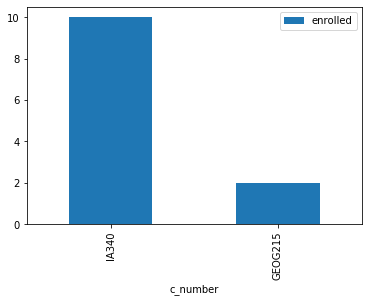

In [24]:
df = pandas.read_sql_query(sql_q3,conn)
df.plot.bar(y='enrolled',x='c_number')

## q4

In [25]:
sql_q4= """
        select gp27.professor.p_name,
        count(gp27.course.c_name) as teaching_number
        from gp27.professor
        inner join gp27.course
        on gp27.professor.p_email = gp27.course.p_email
        group by professor.p_name
        order by teaching_number desc
        """

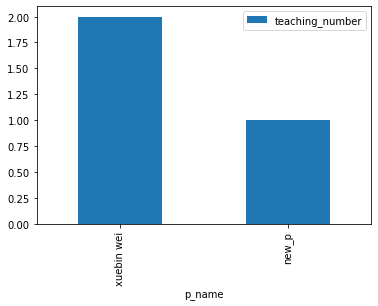

In [26]:
df = pandas.read_sql_query(sql_q4,conn)
df.plot.bar(y='teaching_number',x='p_name')

## q5

In [14]:
sql_q5_professor = """
                    insert into gp27.professor(p_email,p_name,office)
                    values('{}','{}','{}')
                    """.format('new_p1@jmu.edu','new_p','new_o1')

In [15]:
cur.execute(sql_q5_professor)

In [28]:
cur.execute('ROLLBACK')

In [20]:
conn.commit()

In [22]:
df=pandas.read_sql_query('select * from gp27.professor', conn)
df[:]

,p_email,p_name,office
0,weixx@jmu.edu,xuebin wei,hhs112
1,new_p@jmu.edu,new_p,new_office
2,new_p1@jmu.edu,new_p,new_o1


In [29]:
sql_q5_course = """
                    insert into gp27.course(c_number,c_name,room,p_email)
                    values('{}','{}','{}','{}')
                    """.format('ia_new1','new_c_name','online','new_p1@jmu.edu')

In [30]:
cur.execute(sql_q5_course)

In [31]:
conn.commit()

In [32]:
df=pandas.read_sql_query('select * from gp27.course', conn)
df[:]

,c_number,c_name,room,p_email
0,IA340,data mining,online,weixx@jmu.edu
1,GEOG215,intro to GIS,online,weixx@jmu.edu
2,ia_new,new_c_name,online,new_p@jmu.edu
3,ia_new1,new_c_name,online,new_p1@jmu.edu


## q6

In [40]:
sql_q6_course = """
                update gp27.course
                set p_email = '{}'
                where p_email = '{}'
                """.format('new_p1@jmu.edu','weixx@jmu.edu')

In [41]:
cur.execute(sql_q6_course)

In [39]:
#cur.execute('ROLLBACK')

In [42]:
conn.commit()

In [43]:
df=pandas.read_sql_query('select * from gp27.course', conn)
df[:]

,c_number,c_name,room,p_email
0,ia_new,new_c_name,online,new_p@jmu.edu
1,ia_new1,new_c_name,online,new_p1@jmu.edu
2,IA340,data mining,online,new_p1@jmu.edu
3,GEOG215,intro to GIS,online,new_p1@jmu.edu


In [57]:
sql_q6_professor = """
               delete from gp27.professor
               where p_email = '{}'
               """.format('weixx@jmu.edu')

In [59]:
cur.execute(sql_q6_professor)

In [58]:
cur.execute('ROLLBACK')

In [60]:
conn.commit()

In [61]:
df=pandas.read_sql_query('select * from gp27.professor', conn)
df[:]

,p_email,p_name,office
0,new_p@jmu.edu,new_p,new_office
1,new_p1@jmu.edu,new_p,new_o1


## close connection

In [62]:
cur.close()

In [63]:
conn.close()